In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from scipy.stats import norm
# %config InlineBackend.figure_format = 'svg'
%matplotlib qt5


In [103]:
df = pd.read_csv('data\\工业园区测试数据.csv',na_values=('暂无','暂无数据' ))
df.head(7)

,省,市,区（县）,小区名称,房屋面积,房屋类型（室）,房屋类型（厅）,房屋类型（卫）,总层数,楼层部位,房屋朝向,房屋建设年代,总价,单价
0,江苏省,苏州市,工业园区,IALA国际自由水岸,134,4.0,2.0,2.0,11,低,西,2008.0,445,33209
1,江苏省,苏州市,工业园区,IALA国际自由水岸,134,4.0,2.0,2.0,11,低,西,2008.0,445,33209
2,江苏省,苏州市,工业园区,IALA国际自由水岸,131,4.0,2.0,2.0,24,低,南北,2008.0,420,32061
3,江苏省,苏州市,工业园区,IALA国际自由水岸,131,4.0,2.0,2.0,24,低,南北,2008.0,420,32061
4,江苏省,苏州市,工业园区,IALA国际自由水岸,77,2.0,2.0,1.0,18,中,南,2012.0,185,24026
5,江苏省,苏州市,工业园区,IALA国际自由水岸,76,2.0,2.0,1.0,24,高,南,2008.0,220,28947
6,江苏省,苏州市,工业园区,IALA国际自由水岸,76,2.0,2.0,1.0,24,高,南,2008.0,220,28947


In [81]:
# 统计省市区数据
count_0 = np.array([df['省'] != '江苏省']).sum()
count_1 = np.array([df['市'] != '苏州市']).sum()
count_2 = np.array([df['区（县）'] != '工业园区']).sum()
print(count_0)
print(count_1)
print(count_2)

0
0
0


##### 由于省市区数据均一样 故直接删除

In [82]:
df.drop(['省', '市', '区（县）'], axis=1, inplace=True)
df.head(7)

,小区名称,房屋面积,房屋类型（室）,房屋类型（厅）,房屋类型（卫）,总层数,楼层部位,房屋朝向,房屋建设年代,总价,单价
0,IALA国际自由水岸,134,4.0,2.0,2.0,11,低,西,2008.0,445,33209
1,IALA国际自由水岸,134,4.0,2.0,2.0,11,低,西,2008.0,445,33209
2,IALA国际自由水岸,131,4.0,2.0,2.0,24,低,南北,2008.0,420,32061
3,IALA国际自由水岸,131,4.0,2.0,2.0,24,低,南北,2008.0,420,32061
4,IALA国际自由水岸,77,2.0,2.0,1.0,18,中,南,2012.0,185,24026
5,IALA国际自由水岸,76,2.0,2.0,1.0,24,高,南,2008.0,220,28947
6,IALA国际自由水岸,76,2.0,2.0,1.0,24,高,南,2008.0,220,28947


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24440 entries, 0 to 24439
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   小区名称     24440 non-null  object 
 1   房屋面积     24440 non-null  int64  
 2   房屋类型（室）  23918 non-null  float64
 3   房屋类型（厅）  23918 non-null  float64
 4   房屋类型（卫）  11048 non-null  float64
 5   总层数      24440 non-null  int64  
 6   楼层部位     24440 non-null  object 
 7   房屋朝向     22939 non-null  object 
 8   房屋建设年代   21928 non-null  float64
 9   总价       24440 non-null  int64  
 10  单价       24440 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 2.1+ MB


#### 可以看到 房屋类型（卫）中缺失数据达到了50%以上 故直接删除

In [84]:
df.drop(['房屋类型（卫）'], axis=1, inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24440 entries, 0 to 24439
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   小区名称     24440 non-null  object 
 1   房屋面积     24440 non-null  int64  
 2   房屋类型（室）  23918 non-null  float64
 3   房屋类型（厅）  23918 non-null  float64
 4   总层数      24440 non-null  int64  
 5   楼层部位     24440 non-null  object 
 6   房屋朝向     22939 non-null  object 
 7   房屋建设年代   21928 non-null  float64
 8   总价       24440 non-null  int64  
 9   单价       24440 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.9+ MB


#### 查看所有小区名称

In [86]:
unique = df['小区名称'].unique()
print(unique)
unique_direction = df['房屋朝向'].unique() 
print(unique_direction)
unique_location = df['楼层部位'].unique()
print(unique_location)   



['IALA国际自由水岸' 'IALA自由水岸' '阿卡迪亚' '阿卡迪亚·湖境' '阿卡迪亚·花境' '阿卡迪亚二区' '阿卡迪亚湖境'
 '阿卡迪亚花境' '阿卡迪亚三区' '阿卡迪亚四区' '阿卡迪亚五区' '阿卡迪亚一区' '埃拉国际' '昂内天骄花园' '昂内天骄美地'
 '澳韵花园' '澳韵花园二期' '芭堤兰湾' '白领公寓' '白塘景苑' '白塘景苑三四期' '白塘景苑一二期' '白塘壹号' '百步街小区'
 '半月湾' '宝怡大厦' '保利独墅西岸四期' '保利独墅西岸一期' '保利观湖国际' '保利悦璟' '北极星花园' '北园新村' '碧海花园'
 '滨江苑' '滨江苑二期长河湾' '铂金公寓' '铂悦府' '彩香一村' '漕湖花园' '常发爱琴岛' '常发香堤澜湾' '畅苑新村'
 '畅苑一区' '诚品居所' '城邦花园' '城邦花园东区' '城邦花园西区' '城市公寓' '城市经典' '憧憬新村' '春晓别墅' '春之韵'
 '醋库巷' '翠湖雅居' '大湖城邦' '大湖城邦三期' '大龙港新村' '德邑' '地方弄8号' '第五元素' '东百花巷' '东城郡'
 '东城郡，园区' '东城世纪广场' '东淳苑' '东方春晓' '东方花园' '东方维罗纳' '东方维罗纳住宅' '东方文荟苑' '东方之门'
 '东港二村' '东港新村' '东港新村八组团' '东港新村二组' '东港新村二组团' '东港新村九组团' '东港新村六组团' '东港新村七组团'
 '东港新村三组团' '东港新村十二组团' '东港新村十三组团' '东港新村十一组团' '东港新村十组团' '东港新村四组团' '东港新村五组团'
 '东港新村一组团' '东港怡乐花园' '东湖春之韵' '东湖春之韵花园' '东湖大郡' '东湖大郡二期' '东湖大郡三期' '东湖大郡一期'
 '东湖大郡一期东区' '东湖大郡一期西区' '东湖林语' '东环教师新村' '东环里' '东环路1165号小区' '东环路222号'
 '东环路223号' '东环路小区' '东环新村' '东环一三村' '东景公寓' '东沁苑' '东亭家园' '东小桥弄' '东园映象'
 '东苑怡景花园' '东振花园' '东振花园（东振小区）' '东振小区' '董事汇' '董事汇云尚公馆' '都市VIP' '都市花园'
 '

#### 发现朝向不太规范 这里替换一下

In [87]:
df['房屋朝向'] = df['房屋朝向'].str.replace('朝', '', regex=True)
unique_direction = df['房屋朝向'].unique()
print(unique_direction)

['西' '南北' '南' '东' nan '东西' '东南' '北' '东北' '西北' '西南']


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24440 entries, 0 to 24439
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   小区名称     24440 non-null  object 
 1   房屋面积     24440 non-null  int64  
 2   房屋类型（室）  23918 non-null  float64
 3   房屋类型（厅）  23918 non-null  float64
 4   总层数      24440 non-null  int64  
 5   楼层部位     24440 non-null  object 
 6   房屋朝向     22939 non-null  object 
 7   房屋建设年代   21928 non-null  float64
 8   总价       24440 non-null  int64  
 9   单价       24440 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.9+ MB


#### 众数做插补

In [89]:
processing_df = pd.DataFrame()

for name in unique:
    print(name)
    df_new = df[df['小区名称'] == name]
    print(df_new.head(3))
    # 用众数填补缺失值
    if df_new['房屋类型（厅）'].isnull().sum() == df_new['房屋类型（厅）'].shape[0]:
        processing_df = pd.concat([processing_df, df_new], axis=0)
        continue
    else:
        df_new['房屋类型（厅）'] .fillna(df_new['房屋类型（厅）'].mode()[0], inplace=True)
    
    if df_new['房屋类型（室）'].isnull().sum() == df_new['房屋类型（室）'].shape[0]:
        processing_df = pd.concat([processing_df, df_new], axis=0)
        continue
    else:
        df_new['房屋类型（室）']  .fillna(df_new['房屋类型（室）'] .mode()[0], inplace=True)

    if df_new['房屋朝向'] .isnull().sum() == df_new['房屋朝向'].shape[0]:
        processing_df = pd.concat([processing_df, df_new], axis=0)
        continue
    else:
        df_new['房屋朝向'].fillna(df_new['房屋朝向'].mode()[0], inplace=True)

    if df_new['房屋建设年代'].isnull().sum() == df_new['房屋建设年代'].shape[0]:
        processing_df = pd.concat([processing_df, df_new], axis=0)
        continue
    else:
        df_new['房屋建设年代'].fillna(df_new['房屋建设年代'].mode()[0], inplace=True)
    processing_df = pd.concat([processing_df, df_new], axis=0)


# 最后总体做一次插补
processing_df['房屋类型（厅）'].fillna(processing_df['房屋类型（厅）'].mode()[0], inplace=True)
processing_df['房屋类型（室）'].fillna(processing_df['房屋类型（室）'].mode()[0], inplace=True)
processing_df['房屋朝向'].fillna(processing_df['房屋朝向'].mode()[0], inplace=True)
processing_df['房屋建设年代'].fillna(processing_df['房屋建设年代'].mode()[0], inplace=True)
    

IALA国际自由水岸
         小区名称  房屋面积  房屋类型（室）  房屋类型（厅）  总层数 楼层部位 房屋朝向  房屋建设年代   总价     单价
0  IALA国际自由水岸   134      4.0      2.0   11    低    西  2008.0  445  33209
1  IALA国际自由水岸   134      4.0      2.0   11    低    西  2008.0  445  33209
2  IALA国际自由水岸   131      4.0      2.0   24    低   南北  2008.0  420  32061
IALA自由水岸
        小区名称  房屋面积  房屋类型（室）  房屋类型（厅）  总层数 楼层部位 房屋朝向  房屋建设年代   总价     单价
25  IALA自由水岸   130      4.0      2.0   25    低   南北  2007.0  400  30769
26  IALA自由水岸   143      4.0      2.0   28    低    东  2008.0  390  27273
27  IALA自由水岸   141      4.0      2.0   28    高  NaN  2008.0  350  24823
阿卡迪亚
    小区名称  房屋面积  房屋类型（室）  房屋类型（厅）  总层数 楼层部位 房屋朝向  房屋建设年代   总价     单价
35  阿卡迪亚   335      NaN      NaN    0    低   南北  2012.0  700  20896
36  阿卡迪亚   285      NaN      NaN    0    低   南北  2014.0  720  25263
37  阿卡迪亚   284      7.0      2.0    4    中   南北  2014.0  580  20423
阿卡迪亚·湖境
       小区名称  房屋面积  房屋类型（室）  房屋类型（厅）  总层数 楼层部位 房屋朝向  房屋建设年代   总价     单价
70  阿卡迪亚·湖境   133      3.0      2.0    0    

#### 对数值列做标准化 朝向做独热编码 其他做标签编码

In [90]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
processing_df['小区名称'] = encoder1.fit_transform(processing_df['小区名称'])
processing_df['楼层部位'] = encoder2.fit_transform(processing_df['楼层部位'])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['房屋类型（厅）', '房屋类型（室）', '总价','单价']),# 标准化
        ('cat', OneHotEncoder(), ['房屋朝向']), # 独热编码
        ('keep','passthrough' ,[ '小区名称', '楼层部位','房屋建设年代'])# 保留
    ])


In [91]:
processing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24440 entries, 0 to 24439
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   小区名称     24440 non-null  int32  
 1   房屋面积     24440 non-null  int64  
 2   房屋类型（室）  24440 non-null  float64
 3   房屋类型（厅）  24440 non-null  float64
 4   总层数      24440 non-null  int64  
 5   楼层部位     24440 non-null  int32  
 6   房屋朝向     24440 non-null  object 
 7   房屋建设年代   24440 non-null  float64
 8   总价       24440 non-null  int64  
 9   单价       24440 non-null  int64  
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 1.9+ MB


> 顺序有所改变 按照transformer的数据先后顺序来 即['房屋类型（厅）', '房屋类型（室）', '房屋建设年代'] ['房屋朝向'] [ '小区名称', '楼层部位']

#### 对前三列（0-2）做异常值处理

In [92]:

processed_data = preprocessor.fit_transform(processing_df)

In [93]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot([processed_data[:,i] for i in range(0,4)])
plt.xticks([0, 1, 2,3], ['房屋类型（厅）', '房屋类型（室）', '总价', '单价'])
plt.title('箱线图')
plt.show()

In [94]:
processed_df = pd.DataFrame(processed_data)
# print(processed_df.head(3))
# print(processed_df.info())
def filter(column):
    # 计算 Q1, Q3 和 IQR
    Q1 = processed_df[column].quantile(0.25)
    Q3 = processed_df[column].quantile(0.75)
    IQR = Q3 - Q1
    # 定义异常值的条件
    condition = (processed_df[column] < (Q1 - 1.5 * IQR)) | (processed_df[column] > (Q3 + 1.5 * IQR))
    processed_df[column] = np.where(condition,np.nan,processed_df[column])
    processed_df[column].fillna(processed_df[column].mode()[0], inplace=True)

for i in range(0,4):
    filter(i)

processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24440 entries, 0 to 24439
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       24440 non-null  float64
 1   1       24440 non-null  float64
 2   2       24440 non-null  float64
 3   3       24440 non-null  float64
 4   4       24440 non-null  float64
 5   5       24440 non-null  float64
 6   6       24440 non-null  float64
 7   7       24440 non-null  float64
 8   8       24440 non-null  float64
 9   9       24440 non-null  float64
 10  10      24440 non-null  float64
 11  11      24440 non-null  float64
 12  12      24440 non-null  float64
 13  13      24440 non-null  float64
 14  14      24440 non-null  float64
 15  15      24440 non-null  float64
 16  16      24440 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


In [95]:
sns.boxplot([processed_df[i] for i in range(0, 4)])
plt.xticks([0, 1, 2,3], ['房屋类型（厅）', '房屋类型（室）', '总价','单价'])
plt.title('箱线图')
plt.show()

In [96]:
sns.distplot(processed_df[2], fit=norm)
plt.show()
res = stats.probplot(processed_df[2], plot=plt)

In [97]:
# sns.distplot(processed_df[3], fit=norm)
# plt.show()
res = stats.probplot(processed_df[3], plot=plt)

******

#### 聚类分析


In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test= train_test_split(
    processed_df ,train_size=0.8, random_state=200)

In [99]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

def grid_search_clustering(X_train, model, param_grid):
    best_score = -1
    best_params = None
    best_model = None

    for params in ParameterGrid(param_grid):
        clustering = model(**params).fit(X_train)
        if hasattr(clustering, 'labels_'):
            labels = clustering.labels_
        else:
            labels = clustering.predict(X_train)

        # 计算轮廓系数，忽略单一簇情况
        if len(set(labels)) > 1:
            score = silhouette_score(X_train, labels)
            if score > best_score:
                best_score = score
                best_params = params
                best_model = clustering

    return best_score, best_params, best_model

In [100]:
# K-Means 参数
kmeans_grid = {'n_clusters': range(2, 40), 'init': [
    'k-means++', 'random']}

# DBSCAN 参数
dbscan_grid = {'eps': np.arange(0.1, 1.0, 0.1), 'min_samples': range(5, 20)}

# 层次聚类参数
agglo_grid = {'n_clusters': range(2, 40), 'linkage': [
    'ward', 'complete', 'average', 'single']}

In [101]:

kmeans_score, kmeans_params, kmeans_model = grid_search_clustering(
    X_train, KMeans, kmeans_grid)
print(f"Best K-Means Score: {kmeans_score}, Best Params: {kmeans_params}")


dbscan_score, dbscan_params, dbscan_model = grid_search_clustering(
    X_train, DBSCAN, dbscan_grid)
print(f"Best DBSCAN Score: {dbscan_score}, Best Params: {dbscan_params}")

agglo_score, agglo_params, agglo_model = grid_search_clustering(
    X_train, AgglomerativeClustering, agglo_grid)
print(
    f"Best Agglomerative Clustering Score: {agglo_score}, Best Params: {agglo_params}")

In [102]:
def calculate_cluster_metrics(X, cluster_range):
    silhouette_scores = []  
    db_scores = []          
    ch_scores = []         

    for n_clusters in cluster_range:
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(X)

        # Silhouette Coefficient
        if n_clusters > 1:
            silhouette = silhouette_score(X, labels)
            silhouette_scores.append(silhouette)
        else:
            
            silhouette_scores.append(np.nan)

        
        db_score = davies_bouldin_score(X, labels)
        db_scores.append(db_score)

        
        ch_score = calinski_harabasz_score(X, labels)
        ch_scores.append(ch_score)

    return silhouette_scores, db_scores, ch_scores

cluster_range = range(2, 11)
k_means_silhouette_scores, k_means_db_scores, k_means_ch_scores = calculate_cluster_metrics(
    X_train, cluster_range)

KeyboardInterrupt: 

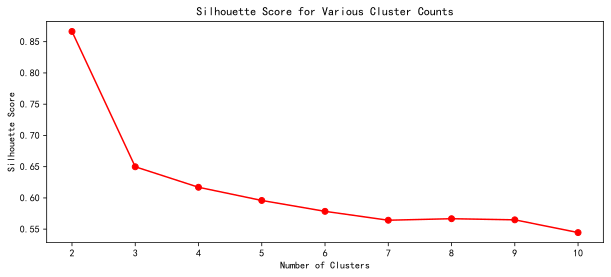

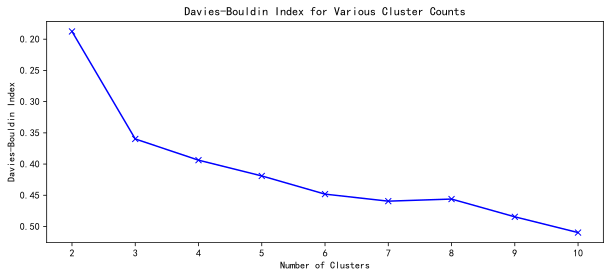

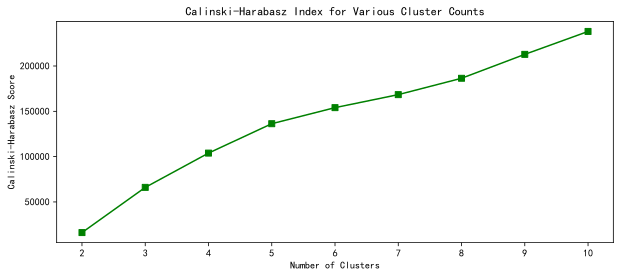

In [ ]:
def plot_metrics_separately(cluster_range, silhouette_scores, db_scores, ch_scores):
    # 绘制轮廓系数
    plt.figure(figsize=(10, 4))
    plt.plot(cluster_range, silhouette_scores, 'r-o', label='Silhouette Score')
    plt.title('Silhouette Score for Various Cluster Counts')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    # plt.grid(True)
    plt.show()

    # 绘制 Davies-Bouldin Index
    plt.figure(figsize=(10, 4))
    plt.plot(cluster_range, db_scores, 'b-x', label='Davies-Bouldin Index')
    plt.title('Davies-Bouldin Index for Various Cluster Counts')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.gca().invert_yaxis()  # Optionally invert y-axis to show lower values are better
    # plt.grid(True)
    plt.show()

    # 绘制 Calinski-Harabasz Index
    plt.figure(figsize=(10, 4))
    plt.plot(cluster_range, ch_scores, 'g-s', label='Calinski-Harabasz Index')
    plt.title('Calinski-Harabasz Index for Various Cluster Counts')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Calinski-Harabasz Score')
    # plt.grid(True)
    plt.show()


plot_metrics_separately(cluster_range, k_means_silhouette_scores, k_means_db_scores, k_means_ch_scores)

In [115]:
X_test

,0,1,2,3,14,15,16
20088,0.271159,0.201851,-0.639754,-0.872591,2.0,0.0,1995.0
21074,0.271159,0.201851,0.348264,0.949032,432.0,0.0,2016.0
15992,0.271159,1.239335,0.930097,1.187571,297.0,2.0,2006.0
13562,0.271159,0.201851,-0.304926,1.932123,186.0,1.0,2014.0
19078,0.271159,-0.835633,-0.304926,0.101472,758.0,2.0,2006.0
...,...,...,...,...,...,...,...
7381,0.271159,0.201851,0.381198,0.527427,217.0,0.0,2004.0
9445,0.271159,1.239335,-0.304926,2.091802,155.0,1.0,2011.0
2184,0.271159,0.201851,-0.332371,-0.755007,57.0,2.0,1999.0
22659,0.271159,-0.835633,-0.340604,0.122465,124.0,1.0,2012.0


In [117]:
X_test.drop([15,16], axis=1, inplace=True)

In [123]:
# 设置为无监督学习 对分类结果进行可视化
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
import numpy as np
from sklearn.decomposition import PCA


fig = plt.figure(figsize=(18, 18))
kmeans = AgglomerativeClustering(n_clusters=2,linkage='ward')
output= kmeans.fit_predict(X_test)

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)

pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_test)

y = output
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, s=80, alpha=0.6)
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')

ax.view_init(elev=18, azim=107)

plt.tight_layout()
plt.show()